<p align="center"><font size="6"><b>Notebook de Charles-Henri SAINT-MARS</b></font></p>

## **Projet de Machine Learning pour estimer le prix d'une voiture d'occasion**
### Exercice réalisé à partir du cours de Machine Learning de José AFOUDA
Lien du cours : https://www.youtube.com/watch?v=7-WsA_arUpg

### <font color="red">Scénario du projet :</font>
Vous avez <u>une entreprise de développement d'applications mobiles</u>  et votre nouveau projet concerne la création d'une application qui met en relation des vendeurs de voitures d'occasion et des potentiels clients. Vous aimeriez ajouter une nouvelle fonctionnalité à cette application: celle de donner la possibilité aux utilisateurs de l'application de connaître le prix correct auquel ils peuvent acheter ou vendre une voiture d'occasion d'après les caractéristiques qu'ils souhaitent afin de ne pas se faire arnaquer par des vendeurs.

Ensuite l'application devra avertir un potentiel acheteur si la voiture qui l'intéresse est au prix "juste" et aussi avertir un vendeur si le prix auquel il veut vendre sa voiture est approprié.

Après avoir collecté des données de caractéristiques de plusieurs centaines de voitures d'occasion ainsi que leur prix de vente sur des plate-formes dédiées, vous décidez donc de construire un modèle de Machine Learning capable de prédire le prix d'une voiture en fonction de ses caractéristiques.

### <font color="red">Importation des modules</font>

In [1]:
# Importation des modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jb # Pour sauvegarder le modèle

### <font color="red">Importation des données</font>

In [2]:
# Données de l'office australien des impôts 
url_data = 'used_cars.csv'
df = pd.read_csv(url_data) # Lecture du fichier csv
df.head()  # Affichage des 5 premières lignes

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Les noms des colonnes ne sont pas définis dans ce jeu de données. Retrouvez les noms des colonnes au niveau de la source des données sur [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile).

In [3]:
# Définition des entêtes
headers = ["symboling","normalized-losses","make","fueltype","aspiration", "num-of-doors","body-style", "drive-wheels",
           "engine-location","wheelbase", "length","width","height","curb-weight","engine-type","num-of-cylinders", 
           "engine-size","fuelsystem","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg",
           "highway-mpg","price"]

In [4]:
# Relecture des données avec les entêtes
df = pd.read_csv(url_data, names = headers)
df.head()  # Affichage des 5 premières lignes

,symboling,normalized-losses,make,fueltype,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheelbase,...,engine-size,fuelsystem,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


NB : Les points d'interrogation dans le jeu de données représentent les valeurs manquantes.

In [5]:
# Affichage des informations sur les données
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fueltype           205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

NB : Nous allons remplacer ces points d'interrogation par des NaN (Not a Number) pour faciliter le traitement des données.
Nous constatons aussi que la variable price est de type object. Nous allons la convertir en float.

In [6]:
df.replace("?", np.nan, inplace = True) # Remplacement des valeurs manquantes par NaN
df.info()  # Affichage des informations sur les données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fueltype           205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

NB : Nous avons mis en évidence les valeurs manquantes. Par exemple, pour la ligne "normalized losses", il y a 164 valeurs au lieu de 205 initialement.

In [7]:
# Affichage du nombre de valeurs manquantes par colonne
df.isnull().sum()  

symboling             0
normalized-losses    41
make                  0
fueltype              0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheelbase             0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuelsystem            0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### <font color="red">Nettoyage des données</font>

In [8]:
# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace = True)
df.isnull().sum() 

symboling            0
normalized-losses    0
make                 0
fueltype             0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheelbase            0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuelsystem           0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# Conversion du type de donnée de la colonne price en float
df.price = df.price.astype("float")
df.info()  # Affichage des informations sur les données

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fueltype           159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheelbase          159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non-null

### <font color="red">Construction d'un modèle de Machine Learning</font>

Pour ce cours d'initiation à la création d'un modèle de Machine Learning, nous allons utiliser la régression linéaire avec comme variable cible "price" (le prix de vente d'une voiture d'occasion) et comme variable indépendante la variable "curb-weight" (poids à vide de la voiture).

Ci-dessous, une bibliothèque de fonctions personnalisées que nous allons utiliser pour visualiser les données et créer le modèle de régression linéaire.

In [10]:
# Définition de la classe Plotter pour visualiser les données et la droite de régression
class XYPlotter:
    def __init__(self, x_label='X', y_label='Y', title='Linear Regression'):
        self.xMax = 100 # unité maximale en largeur par défaut
        self.yMax = 100 # unité maximale en hauteur par défaut
        self.xMin = 0 # unité minimale en hauteur par défaut
        self.yMin = 0 # unité minimale en hauteur par défaut
        self.x_label = x_label
        self.y_label = y_label
        self.title = title
        # Créer une figure et un axe avec une taille spécifiée
        self.fig, self.ax = plt.subplots(figsize=(10, 6))  # Taille de la figure en pouces (largeur, hauteur)

    def plot_points(self, xArr, yArr, color="blue"):
        self.xMax = max(xArr)
        self.yMax = max(yArr)
        self.xMin = min(xArr)
        self.yMin = min(yArr)
        self.ax.set_xlabel(self.x_label)
        self.ax.set_ylabel(self.y_label)
        self.ax.set_title(self.title)
        self.ax.grid(True)
        self.ax.scatter(xArr, yArr, color=color)

    def plot_reg_line(self, weight, bias, color="red"):
        x_vals = [self.xMin, self.xMax]
        y_vals = [self.xMin*weight+bias, self.xMax*weight+bias]
        self.ax.plot(x_vals, y_vals, color=color)

    def show(self):
        self.ax.set_xlim(0, self.xMax) # Limites de l'axe x
        self.ax.set_ylim(0, self.yMax) # Limites de l'axe y
        plt.show()


# Définition de la classe CreateLinearRegression gérer le modèle de régression linéaire
class CreateLinearRegression:
    def __init__(self, xArr, yArr):
        self.xArr = xArr
        self.yArr = yArr
        self.nb_points = len(xArr)
        self.weight = 0
        self.bias = 0

    def train(self):
        # Moyenne de xArr
        xArrMean = sum(self.xArr) / self.nb_points
        # Moyenne de yArr
        yArrMean = sum(self.yArr) / self.nb_points
        # Calcul des x_i - x_mean
        xArr_sub_xArrMean = [x - xArrMean for x in self.xArr]
        # Calcul des y_i - y_mean
        yArr_sub_yArrMean = [y - yArrMean for y in self.yArr]
        # Calcul des (x_i - x_mean)^2
        xArr_sub_xArrMean_squared = [x**2 for x in xArr_sub_xArrMean]
        # Calcul des (x_i - x_mean)(y_i - y_mean)
        xArr_sub_xArrMean_yArr_sub_yArrMean = [x * y for x, y in zip(xArr_sub_xArrMean, yArr_sub_yArrMean)]
        # Pente de la droite de régression de y sur x
        self.weight = sum(xArr_sub_xArrMean_yArr_sub_yArrMean) / sum(xArr_sub_xArrMean_squared)
        # Ordonnée à l'origine de la droite de régression de y sur x
        self.bias = yArrMean - self.weight * xArrMean
        return (self.weight, self.bias)
    
    def correlation(self):
        # Calcul de la covariance
        cov = sum(x*y for x, y in zip(self.xArr, self.yArr)) / self.nb_points - sum(self.xArr) * sum(self.yArr) / self.nb_points**2
        # Calcul de la variance de xArr
        var_x = sum(x**2 for x in self.xArr) / self.nb_points - (sum(self.xArr) / self.nb_points)**2
        # Calcul de la variance de yArr
        var_y = sum(y**2 for y in self.yArr) / self.nb_points - (sum(self.yArr) / self.nb_points)**2
        # Coefficient de corrélation : cov² / (var_x * var_y)
        r = cov / (var_x * var_y)**0.5
        return r
    
    def save_model(self, model_name):
        jb.dump((self.weight, self.bias), model_name)

    def load_model(self, model_name):
        self.weight, self.bias = jb.load(model_name)
        return (self.weight, self.bias)
    
    def predict(self, x):
        return self.weight * x + self.bias
    

# Fonction pour afficher les caractéristiques du modèle
def display_features(weight, bias):
    print(f"Slope (weight): {weight}")
    print(f"Intercept (bias): {bias}")
    

In [11]:
# Préparation des données
X = df["curb-weight"]  # Variable indépendante en entrée
y = df["price"]  # Variable dépendante en sortie


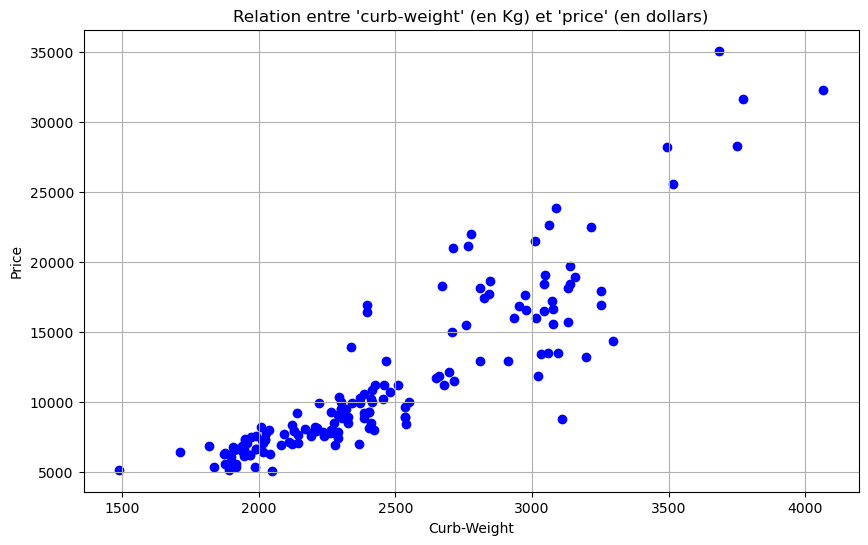

In [12]:
# Visualisation de la relation entre la variable "price" et la variable "curb-weight"
# Initialisation du plotter
plotter = XYPlotter(x_label='Curb-Weight', y_label='Price', title="Relation entre 'curb-weight' (en Kg) et 'price' (en dollars)")
    
# Visualisation des données
plotter.plot_points(X, y)


**Interprétation du graphique** <br>
Ce graphique montre la relation entre le poids à vide d'un véhicule (en anglais "curb-weight") sur l'axe des abscisses (x) et le prix du véhicule (en anglais "price") sur l'axe des ordonnées (y). Il s'agit d'un nuage de points (scatter plot) avec chaque point représentant un véhicule.

**Points clés :**
- Poids à vide ("curb-weight") : Les valeurs sur l'axe des x vont d'environ 1500 à 4100.
- Prix ("price") : Les prix vont de 5000 à plus de 35000 sur l'axe des y.
- Tendance générale : Il semble qu'à mesure que le poids à vide du véhicule augmente, le prix a tendance à augmenter également. Cela suggère que les véhicules plus lourds ont tendance à être plus chers. Cependant, il y a des points éparpillés. Cela montre qu'il existe des exceptions à cette tendance.

Slope (weight): 10.899007035334945
Intercept (bias): -15378.234792920166


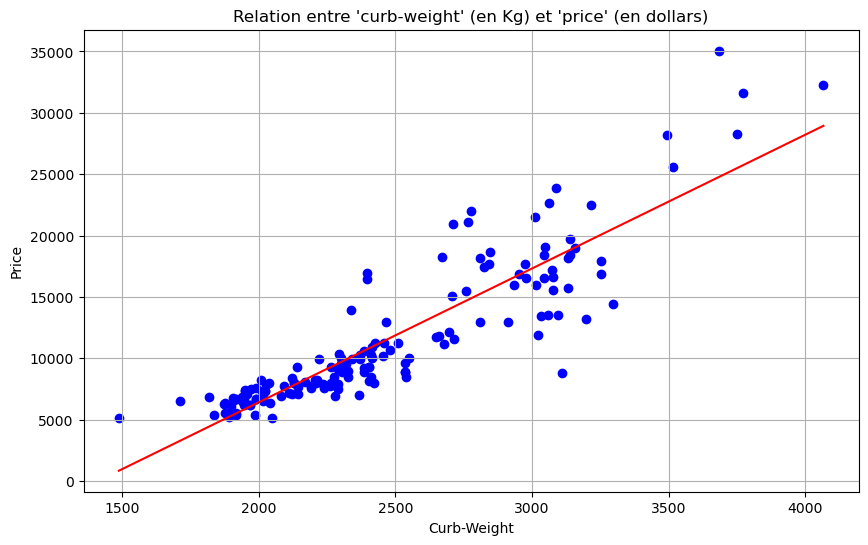

In [13]:
# Création du modèle avec les données d'entrée et de sortie
model = CreateLinearRegression(X, y)

# Entraînement du modèle
model.train()

# Initialisation du plotter
plotter = XYPlotter(x_label='Curb-Weight', y_label='Price', title="Relation entre 'curb-weight' (en Kg) et 'price' (en dollars)")

# Visualisation des données
plotter.plot_points(X, y)

# Visualisation de la droite de régression linéaire
plotter.plot_reg_line(model.weight, model.bias)
  
# Affichage des caractéristiques du modèle
display_features(model.weight, model.bias)


**Interpétation de la pente de la droite de régression linéaire :** La pente de la droite de régression linéaire est positive. Cela signifie que pour chaque augmentation de 1Kg du poids à vide du véhicule, le prix du véhicule augmente en moyenne de 10.90 dollars.

In [14]:
# Performance du modèle
r = model.correlation()
print("Coefficient de corrélation r = ", r) # r est le coefficient de corrélation. C'est une métrique (parmi d'autres) qui permet de mesurer la performance du modèle de régression linéaire.

Coefficient de corrélation r =  0.8936390528402949


Un coefficient de corrélation de 0.8936 (donc supérieur à 0.85) montre qu'il y a une forte corrélation entre le prix des véhicules et leur poids à vide.  Cela signifie que le poids à vide des véhicules est très probablement un bon prédicteur du prix des véhicules. De plus, le coefficient de corrélation est positif, ce qui signifie que les véhicules plus lourds ont tendance à être plus chers.

### <font color="red">Estimations de nouvelles données par extrapolation</font> <br>

In [15]:
# Deux nouvelles voitures dont les poids à vide sont respectivement égaux à 3500 Kg et 6800 Kg
nouvelles_voitures = pd.DataFrame({"curb-weight": [3500, 6800]})
nouvelles_voitures

,curb-weight
0,3500
1,6800


In [16]:
# Estimation des prix des deux nouvelles voitures
prix_estimés = model.predict(nouvelles_voitures)
prix_estimés

,curb-weight
0,22768.289831
1,58735.013047


### <font color="red">Sauvegarde, chargement et vérification du modèle</font>

In [17]:
# Sauvegarde du modèle entraîné
jb.dump(model, "car_model.pkl")

['car_model.pkl']

In [18]:
# Chargement du modèle sauvegardé
model_loaded = jb.load("car_model.pkl")

# Vérification du modèle chargé
print("Pente : ", model_loaded.weight)
print("Ordonnée à l'origine : ", model_loaded.bias)

Pente :  10.899007035334945
Ordonnée à l'origine :  -15378.234792920166


In [19]:
# Utilisation du modèle chargé pour estimer le prix des deux nouvelles voitures
estimated_price = model_loaded.predict(nouvelles_voitures)
estimated_price

,curb-weight
0,22768.289831
1,58735.013047


### <font color="red">Implémentation du modèle dans une application</font>

In [20]:
# Construction d'une fonction montrant le fonctionnement de l'application (voir scénario)

 # Chargement du modèle
model_loaded = jb.load("car_model.pkl")

# Fonction principale de l'application
def app():
    utilisateur = input("Vous êtes un acheteur ou un vendeur ? ('acheteur'/'vendeur')\n>>>")
    if utilisateur not in ['acheteur', 'vendeur']:
        print("Veuillez saisir soit 'acheteur' soit 'vendeur' à la première question. Merci de relancer le programme.")
        return
    poids_a_vide = float(input("Entrez le poids à vide de la voiture\n>>>"))
    prix_annonce = float(input("Entrez le prix de la voiture\n>>>"))
    print("Utilisateur : ", utilisateur)
    print("Prix voiture : ", prix_annonce)
    prix_estime = estimer_prix(poids_a_vide)
    print("Prix estimé : ", prix_estime)
    afficher_resultat(prix_annonce, prix_estime, utilisateur)

# Fonction de calcul du prix
def estimer_prix(poids_a_vide):
    prix_estime = model_loaded.predict(pd.DataFrame({'curb-weight':[poids_a_vide]}))
    return prix_estime["curb-weight"][0]

# Fonction d'affichage du résultat
def afficher_resultat(prix_annonce, prix_estime, utilisateur):
    if utilisateur == 'acheteur':
        message = "Vous allez faire une bonne affaire" if prix_annonce <= prix_estime else "Le prix affiché sur l'annonce est élevé"
    else:
        if prix_annonce == prix_estime:
            message = "Le prix de vente de votre voiture est correct"
        else:
            message = "Le prix de vente de votre voiture est faible" if prix_annonce < prix_estime else "Le prix de vente de votre voiture est élevé"
    print(f"{message} car pour une voiture avec ce poids à vide, notre modèle estime un prix égal à ${round(prix_estime, 2)}")

app()


Utilisateur :  acheteur
Prix voiture :  21000.0
Prix estimé :  22768.289830752146
Vous allez faire une bonne affaire car pour une voiture avec ce poids à vide, notre modèle estime un prix égal à $22768.29
